In [3]:
import matplotlib.pyplot as plt
from vc_sample.density_estimation import KernelDensityEstimator
from vc_sample.kernels import GaussianKernel, kernel_scale_factor
from vc_sample.void_and_cluster import VoidAndCluster
from vc_sample import spectral_analysis

In [ ]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [16]:
from sklearn.datasets import make_s_curve

s_curve, s_curve_color = make_s_curve(n_samples=2000)

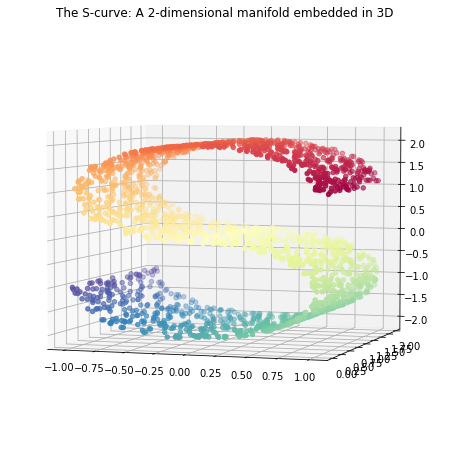

In [40]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(projection='3d')
ax.set_title('The S-curve: A 2-dimensional manifold embedded in 3D')
ax.scatter(s_curve[:, 0], s_curve[:, 1], s_curve[:, 2], c=s_curve_color,
           cmap=plt.cm.Spectral)
ax.view_init(4, -72)

It is not possible to find a fixed kernel bandwidth that allows us to
sample along the s-curve.

The reliance on the fixed bandwith kernel is thus problematic for stratified sampling
on a manifold embedded in a higher dimensional space.

In [32]:
num_samples = 200

kernel_scale1d = 5.0 * kernel_scale_factor(dimensionality=1, num_points=s_curve.shape[0],
                                           num_samples=num_samples)
kernel_scale1d

50.0

In [33]:
density_estimator = KernelDensityEstimator(s_curve, GaussianKernel(sigma=kernel_scale1d))
vc = VoidAndCluster(density_estimator, s_curve.shape[0], num_initial_samples=10)

sample_indices = vc.sample(size=num_samples)
curve_samples = s_curve[sample_indices]
curve_color_samples = s_curve_color[sample_indices]

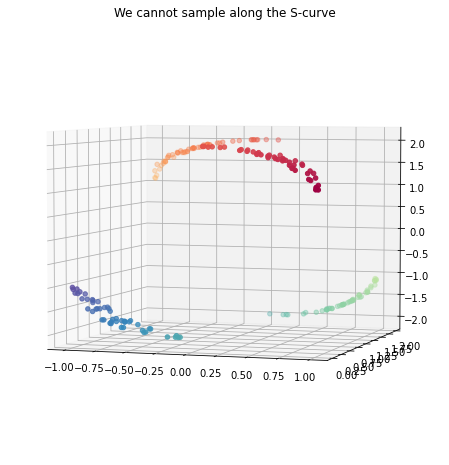

In [38]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(projection='3d')
ax.set_title('We fail to sample along the S-curve')
ax.scatter(curve_samples[:, 0], curve_samples[:, 1], curve_samples[:, 2],
           c=curve_color_samples, cmap=plt.cm.Spectral)
ax.view_init(4, -72)